Author: Shahzaib (Ai Dev)

## Reading Image and Extract points from Json

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
import cv2

img_path='./crops/pic_l.jpg'
# img_path_pre=img_path.replace('_post_', '_pre_')
# img_array_pre=np.array(Image.open(img_path_pre))
img_obj = Image.open(img_path)
img_array = np.array(img_obj)
label_path = img_path.replace('jpg', 'json').replace('images', 'labels')
# print(label_path)
label_file = open(label_path)
label_data = json.load(label_file)
# print(label_data)
# plt.figure(figsize=(5,5))
# plt.imshow(img_array_pre)

a = label_data['shapes']
# print(a)
for b in a:
    c = b['points']
    # print(b['points'])

# print(c)

width, height, _ = img_array.shape
polygon = c



## Converting points polygon to Image Mask

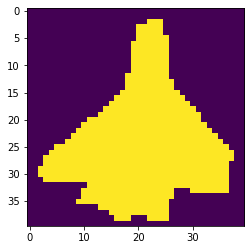

In [128]:
from matplotlib.path import Path
width, height= img_obj.size
poly_path=Path(polygon)
x, y = np.mgrid[:height, :width]
coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1)))
mask = poly_path.contains_points(coors).reshape(height, width).T
plt.imshow(mask);


## Apply mask as a filter on Original Image

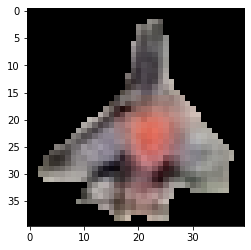

In [129]:
img_masked=np.zeros(img_array.shape,dtype=img_array.dtype)
img_masked[mask]=img_array[mask]
# plt.figure(figsize=(6,6))
plt.imshow(img_masked);


## Convert resulted image to transparent image by adding 'Alpha Channel'

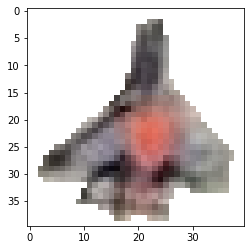

In [130]:
# Load image as Numpy array in BGR order
# na = cv2.imread('I5jKW.png')
na = img_masked

# Make a True/False mask of pixels whose BGR values sum to more than zero
alpha = np.sum(na, axis=-1) > 0

# Convert True/False to 0/255 and change type to "uint8" to match "na"
alpha = np.uint8(alpha * 255)

# Stack new alpha layer with existing image to go from BGR to BGRA, i.e. 3 channels to 4 channels
res = np.dstack((na, alpha))

# Save result
# cv2.imwrite('result.png', res)

plt.imshow(res);

## All in One Script for Complete folder Convertion

In [1]:
import os, glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
import cv2
from matplotlib.path import Path
from tqdm import tqdm

inputFolder = './crops'
outputFolder = './png_objs'

imgfiles = glob.glob(inputFolder+'/*.jpg')

# img_path='./crops/pic_l.jpg'

for img_path in tqdm(imgfiles):
    img_obj = Image.open(img_path)
    img_array = np.array(img_obj)
    label_path = img_path.replace('jpg', 'json').replace('images', 'labels')
    label_file = open(label_path)
    label_data = json.load(label_file)

    a = label_data['shapes']
    for b in a:
        c = b['points']

    width, height, _ = img_array.shape
    polygon = c
    width, height= img_obj.size
    poly_path=Path(polygon)
    x, y = np.mgrid[:height, :width]
    coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1)))
    mask = poly_path.contains_points(coors).reshape(height, width).T
    img_masked=np.zeros(img_array.shape,dtype=img_array.dtype)
    img_masked[mask]=img_array[mask]
    na = img_masked
    alpha = np.sum(na, axis=-1) > 0
    alpha = np.uint8(alpha * 255)
    res = np.dstack((na, alpha))

    # res = cv2.resize(res, dsize=(100, 100))

    img_name = img_path.split('\\')[-1][:-4]
    # Save result
    cv2.imwrite(outputFolder+'/'+img_name+'_t.png', res)

print("Done Thanks!")

100%|██████████| 62/62 [00:00<00:00, 269.77it/s]

Done Thanks!


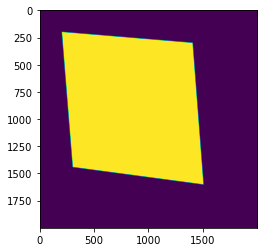

In [30]:
import pylab as plt
import numpy as np
from matplotlib.path import Path

width, height=2000, 2000

polygon=[(0.1*width, 0.1*height), (0.15*width, 0.7*height), (0.8*width, 0.75*height), (0.72*width, 0.15*height)]
poly_path=Path(polygon)

x, y = np.mgrid[:height, :width]
coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) # coors.shape is (4000000,2)

mask = poly_path.contains_points(coors)
plt.imshow(mask.reshape(height, width))
plt.show()